# 图像亚像素平移
### 原理
实域的平移等于在频率域的像移动

In [7]:
# author: Zhijie Tan
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from PIL import Image
from pylab import *
from matplotlib.font_manager import FontProperties
import numpy as np
matplotlib.rcParams['font.sans-serif']=['Consolas-with-Yahei']

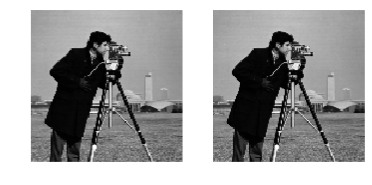

In [15]:
Im = Image.open('cameraman.tif')
Ny,Nx = 128,128
Im = Im.resize((Ny,Nx))## 图像分辨率变低
Im = np.array(Im)
Ly,Lx = 1e-3,1e-3
x = np.linspace(-Nx/2,Nx/2-1,Nx)
y = np.linspace(-Ny/2,Ny/2-1,Ny)
x = x*Lx/Nx
y = y*Ly/Ny
fx = x/Lx
fy = y/Ly
[Fy,Fx] = np.meshgrid(fy,fx)
delta_x = Lx/Nx/2
delta_y = Ly/Ny/2
phase = np.exp(1j*2*np.pi*(delta_x*Fx+delta_y*Fy))
Im_trans = np.fft.ifft2(np.fft.fft2(Im)*phase)
figure()
subplot(131)
imshow(Im,cmap='gray')
axis('off')
subplot(132)
imshow(np.abs(Im_trans),cmap='gray')
axis('off')
subplot(132)
imshow(np.abs(Im_trans),cmap='gray')
axis('off')
show()



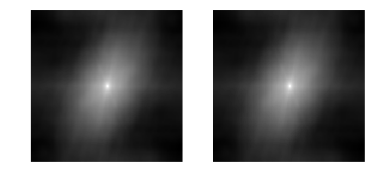

In [21]:
crossCoorIm = np.fft.fftshift(np.fft.ifft2(np.fft.fft2(Im)*np.conj(np.fft.fft2(Im_trans))))
autoCoorIm = np.fft.fftshift(np.fft.ifft2(np.fft.fft2(Im)*np.conj(np.fft.fft2(Im))))
subplot(121)
imshow(np.abs(crossCoorIm), cmap='gray')
axis('off')
subplot(122)
imshow(np.abs(autoCoorIm), cmap='gray')
axis('off')
show()
